# ReforesTree Data Exploration

In this notebook, we explore the ReforesTree dataset. 
We inspect `field_dataset.csv` and `final_dataset.csv`.
The purpose is to obtain an understanding of what is contained in the datasets
Furthermore, we illustrate the differences between the two datasets as a result of the object detection and matching algorithm (with deepforest and OneForest)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

plt.rcParams['figure.dpi'] = 125

def df_size_ratio(df_1: pd.DataFrame, df_2: pd.DataFrame):
    return len(df_1)/len(df_2)

### `field_dataset.csv`

In [2]:
FIELD_DATASET_FILEPATH = '../data/field_data.csv'

field_data_df = pd.read_csv(FIELD_DATASET_FILEPATH)
print('Columns in field data: ', field_data_df.columns.to_list())
print('Number of trees in field data: ', len(field_data_df))

Columns in field data:  ['name', 'lat', 'lon', 'diameter', 'height', 'year', 'plot_id', 'site', 'X', 'Y', 'updated diameter', 'group', 'AGB', 'carbon']
Number of trees in field data:  4663


Distribution of different `group`s 

In [3]:
groups = field_data_df.group.unique()
groups.sort()

print('Unique values in group: ', field_data_df.group.unique())

print('Distribution of groups')
for group in groups:
    group_data = field_data_df[field_data_df.group==group]
    print(f'{group}: {len(group_data)} ({df_size_ratio(group_data, field_data_df)*100:.2f}%)')

Unique values in group:  ['cacao' 'other' 'fruit' 'banana' 'citrus' 'timber']
Distribution of groups
banana: 1504 (32.25%)
cacao: 2042 (43.79%)
citrus: 68 (1.46%)
fruit: 751 (16.11%)
other: 161 (3.45%)
timber: 137 (2.94%)


Number of trees in different sites

In [4]:
site_names = field_data_df.site.unique()
print('Site names: ', site_names)
for name in site_names:
    field_data_with_site = field_data_df[field_data_df.site==name]
    print(f'Number of trees in {name}: ', len(field_data_with_site))

Site names:  ['Nestor Macias RGB' 'Leonor Aspiazu RGB' 'Carlos Vera Arteaga RGB'
 'Carlos Vera Guevara RGB' 'Flora Pluas RGB' 'Manuel Macias RGB']
Number of trees in Nestor Macias RGB:  872
Number of trees in Leonor Aspiazu RGB:  789
Number of trees in Carlos Vera Arteaga RGB:  743
Number of trees in Carlos Vera Guevara RGB:  929
Number of trees in Flora Pluas RGB:  846
Number of trees in Manuel Macias RGB:  484


Some `diameter`s are missing. These are recorded in the `.csv` file as having `0.0m`

In [5]:
field_data_without_diameter = field_data_df[field_data_df.diameter == 0]

print('Number of NaN in diameter: ', len(field_data_without_diameter), f' ({df_size_ratio(field_data_without_diameter, field_data_df)*100:.2f}%)')
for group in groups:
    group_data = field_data_without_diameter[field_data_without_diameter.group==group]
    print(f'{group}: ', len(group_data), f' ({df_size_ratio(group_data, field_data_df)*100:.2f}%)')

Number of NaN in diameter:  2042  (43.79%)
banana:  24  (0.51%)
cacao:  1806  (38.73%)
citrus:  65  (1.39%)
fruit:  113  (2.42%)
other:  7  (0.15%)
timber:  27  (0.58%)


How do the `diameter` and `AGB` relate to each other?

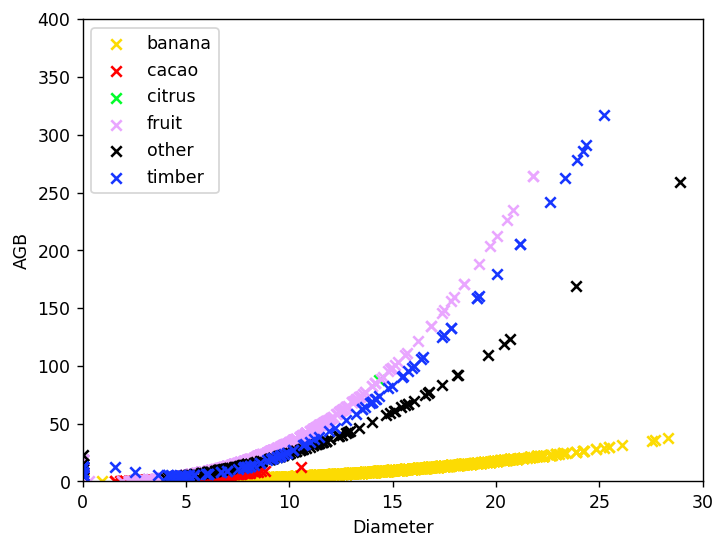

In [6]:
cmap = {'banana': '#fcdb03',
        'cacao': '#ff0000',
        'citrus': '#03fc2c',
        'fruit': '#e9a6ff',
        'timber': '#1736ff',
        'other': '#000000'} 
for group in groups:
    group_field_data = field_data_df[field_data_df.group==group]
    plt.scatter(group_field_data.diameter, group_field_data.AGB, marker='x', c=cmap[group], label=group)
plt.xlim([0, 30])
plt.ylim([0, 400])
plt.xlabel('Diameter')
plt.ylabel('AGB')
plt.legend()

### `final_dataset.csv`

In [7]:
FINAL_DATASET_FILEPATH = '../data/final_dataset.csv'

final_data_df = pd.read_csv(FINAL_DATASET_FILEPATH)
print('Columns in final datset: ', final_data_df.columns.to_list())
print('Total number of trees: ', len(final_data_df))

final_data_df.head()

Columns in final datset:  ['img_path', 'xmin', 'ymin', 'xmax', 'ymax', 'score', 'img_name', 'tile_index', 'tile_xmin', 'tile_ymin', 'tile_xmax', 'tile_ymax', 'x', 'y', 'Xmin', 'Ymin', 'Xmax', 'Ymax', 'X_d', 'Y_d', 'lon_d', 'lat_d', 'is_musacea_d', 'is_banana', 'ground_index', 'name', 'lat_g', 'lon_g', 'diameter', 'height', 'year', 'plot_id', 'tree_id', 'is_musacea_g', 'site', 'X_g', 'Y_g', 'updated diameter', 'group', 'updated height', 'AGB', 'carbon', 'id']
Total number of trees:  4663


,img_path,xmin,ymin,xmax,ymax,score,img_name,tile_index,tile_xmin,tile_ymin,...,is_musacea_g,site,X_g,Y_g,updated diameter,group,updated height,AGB,carbon,id
0,Carlos Vera Guevara RGB_3_0_8305_4000_12305.png,3332.557861,19.092411,3661.390137,364.616425,0.531211,Carlos Vera Guevara RGB,3,0,8305,...,1.0,Carlos Vera Guevara RGB,5298.555843,7709.844671,10.281385,banana,0.0,4.293300,1.674387,30
1,Carlos Vera Guevara RGB_3_0_8305_4000_12305.png,3162.579834,2148.233398,3431.632324,2379.467041,0.511510,Carlos Vera Guevara RGB,3,0,8305,...,1.0,Carlos Vera Guevara RGB,5315.345160,8606.745732,13.528139,banana,0.0,7.702971,3.004159,112
2,Carlos Vera Guevara RGB_3_0_8305_4000_12305.png,2893.605713,244.011108,3095.620605,451.257812,0.251310,Carlos Vera Guevara RGB,3,0,8305,...,1.0,Carlos Vera Guevara RGB,5228.142461,7935.770200,12.732366,banana,0.0,6.769828,2.640233,179
3,Carlos Vera Guevara RGB_3_0_8305_4000_12305.png,2595.111084,1703.712402,2765.227295,1865.253418,0.217742,Carlos Vera Guevara RGB,3,0,8305,...,1.0,Carlos Vera Guevara RGB,4434.058601,8354.081799,9.867583,banana,0.0,3.933601,1.534104,93
4,Carlos Vera Guevara RGB_10_7600_7600_11600_116...,249.691879,123.626862,439.557648,302.768402,0.282849,Carlos Vera Guevara RGB,10,7600,7600,...,1.0,Carlos Vera Guevara RGB,8257.952942,7554.538338,17.825312,banana,0.0,13.862143,5.406236,162


Number of tiles (per image)

In [8]:
print('Total number of tiles: ', len(final_data_df.img_path.unique()))
image_names = final_data_df.img_name.unique()
for name in image_names:
    image_final_data = final_data_df[final_data_df.img_name==name]
    print(f'Number of tiles in {name}: ', len(image_final_data.img_path.unique()))

Total number of tiles:  100
Number of tiles in Carlos Vera Guevara RGB:  15
Number of tiles in Carlos Vera Arteaga RGB:  16
Number of tiles in Flora Pluas RGB:  21
Number of tiles in Leonor Aspiazu RGB:  20
Number of tiles in Manuel Macias RGB:  12
Number of tiles in Nestor Macias RGB:  16


Distribution of `group`s (should be equivalent to `field_data.csv`)

In [9]:
groups = final_data_df.group.unique()
groups.sort()

print('Unique values in group: ', groups)

print('Distribution of groups')
for group in groups:
    group_data = final_data_df[final_data_df.group==group]
    print(f'{group}: {len(group_data)} ({df_size_ratio(group_data, final_data_df)*100:.2f}%)')

Unique values in group:  ['banana' 'cacao' 'citrus' 'fruit' 'other' 'timber']
Distribution of groups
banana: 1504 (32.25%)
cacao: 2042 (43.79%)
citrus: 68 (1.46%)
fruit: 751 (16.11%)
other: 161 (3.45%)
timber: 137 (2.94%)


Number of overlapping bounding boxes

In [17]:
print('Number of overlapping bounding boxes by group')
for group in groups:
    group_data = final_data_df[final_data_df.group==group]
    count = 0
    for idx, row in group_data.iterrows():
        is_overlapping = row[["x", "y"]] == final_data_df[["x", "y"]]
        if is_overlapping.any(axis="columns").sum() > 1:
            count += 1
    print(f'{group}: {count} ({count/len(final_data_df)*100:.2f}%)')

Number of overlapping bounding boxes by group
banana: 160 (3.43%)
cacao: 816 (17.50%)
citrus: 29 (0.62%)
fruit: 433 (9.29%)
other: 67 (1.44%)
timber: 67 (1.44%)


## Visualize bounding boxes

False

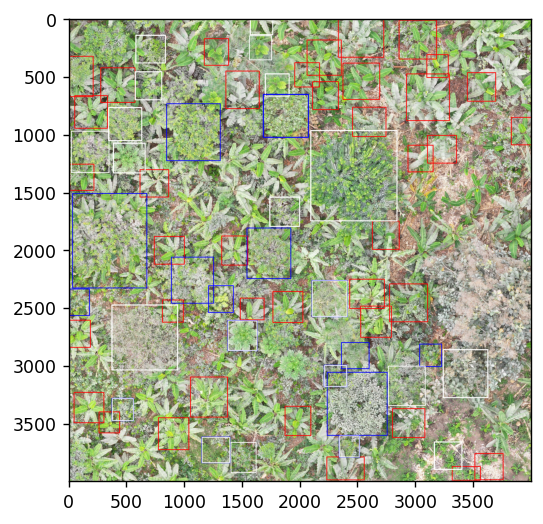

In [12]:
TILE_OF_INTEREST = 'Nestor Macias RGB_9_7600_3800_11600_7800.png'
SITE_OF_INTEREST = 'Nestor Macias RGB'
TILES_DIR = os.path.join('../data/tiles/')

tile_filepath = os.path.join(TILES_DIR, SITE_OF_INTEREST, TILE_OF_INTEREST)
tile_img = cv2.imread(tile_filepath)
tile_img = cv2.cvtColor(tile_img, cv2.COLOR_BGR2RGB)


final_data_tile = final_data_df[final_data_df.img_path == TILE_OF_INTEREST]
for idx, tree_data in final_data_tile.iterrows():
    tl_br = (tree_data.xmin, tree_data.ymin, tree_data.xmax, tree_data.ymax)
    x = int(tree_data.xmin)
    y = int(tree_data.ymin)
    w = int(tree_data.xmax) - int(tree_data.xmin)
    h = int(tree_data.ymax) - int(tree_data.ymin)
    tl_br = [x,y,w,h]
    if tree_data.is_musacea_g:
        colour = [255, 0, 0]
    elif tree_data.group == 'cacao':
        colour = [255, 255, 255]
    else:
        colour = [0, 0, 255]
    cv2.rectangle(tile_img, tl_br, colour, thickness=5)

plt.imshow(tile_img)

tile_img_bgr = cv2.cvtColor(tile_img, cv2.COLOR_RGB2BGR)
output_filepath = '/workspaces/AI4Good_Group3a/reports/figures/Nestor Macias RGB_9_bbox.png'
cv2.imwrite(output_filepath, tile_img_bgr)

### Overlapping bounding boxes

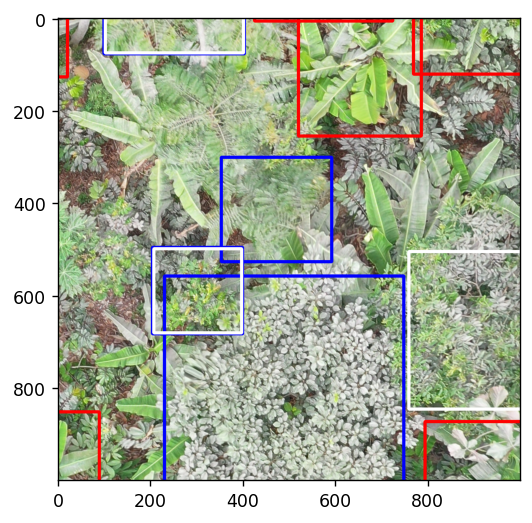

In [13]:
plt.imshow(tile_img[2500:3500, 2000:3000])
plt.show()

### Missing bounding boxes

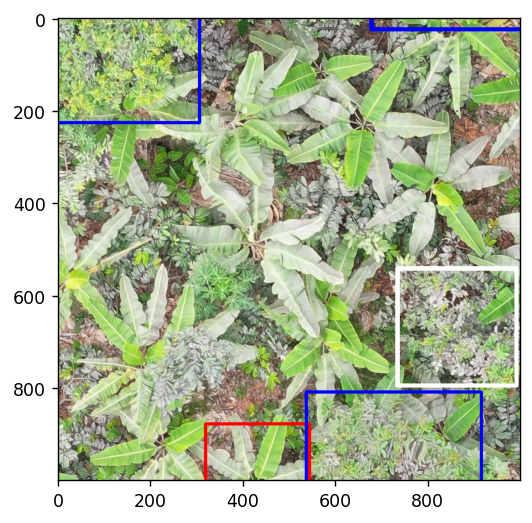

In [14]:
plt.imshow(tile_img[1000:2000, 1000:2000])
plt.show()

### Bounding box without tree

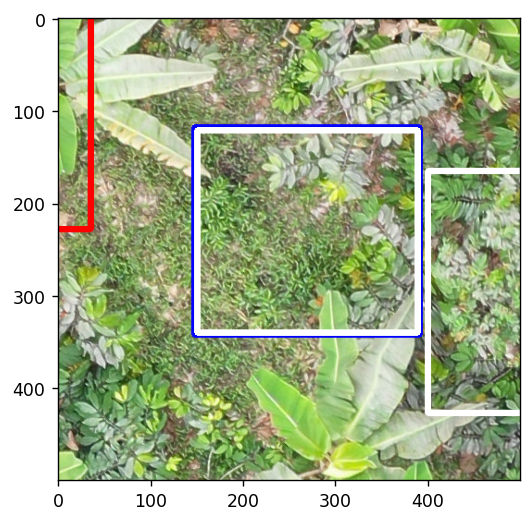

In [15]:
plt.imshow(tile_img[3500:4000, 1000:1500])
plt.show()